<a href="https://colab.research.google.com/github/thisisanuragn/ANURAG-N/blob/main/ExittestAnuragN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv('/content/Coupen.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12681 non-null  object
 1   passanger             12679 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12681 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12681 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [43]:
data.isnull().sum()

destination                 3
passanger                   5
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  3
gender                      0
age                         0
maritalStatus               3
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 153
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [44]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


# **Exploratory Data Analysis (EDA)**

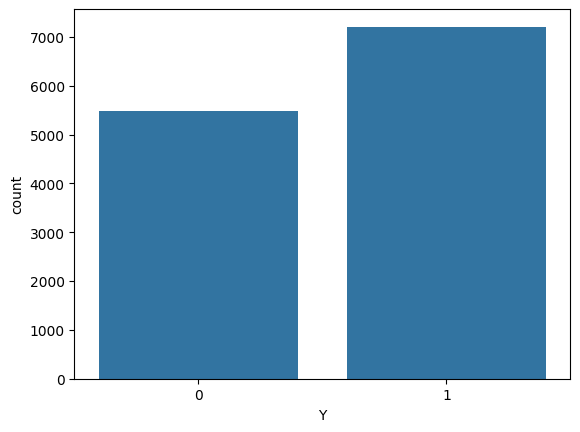

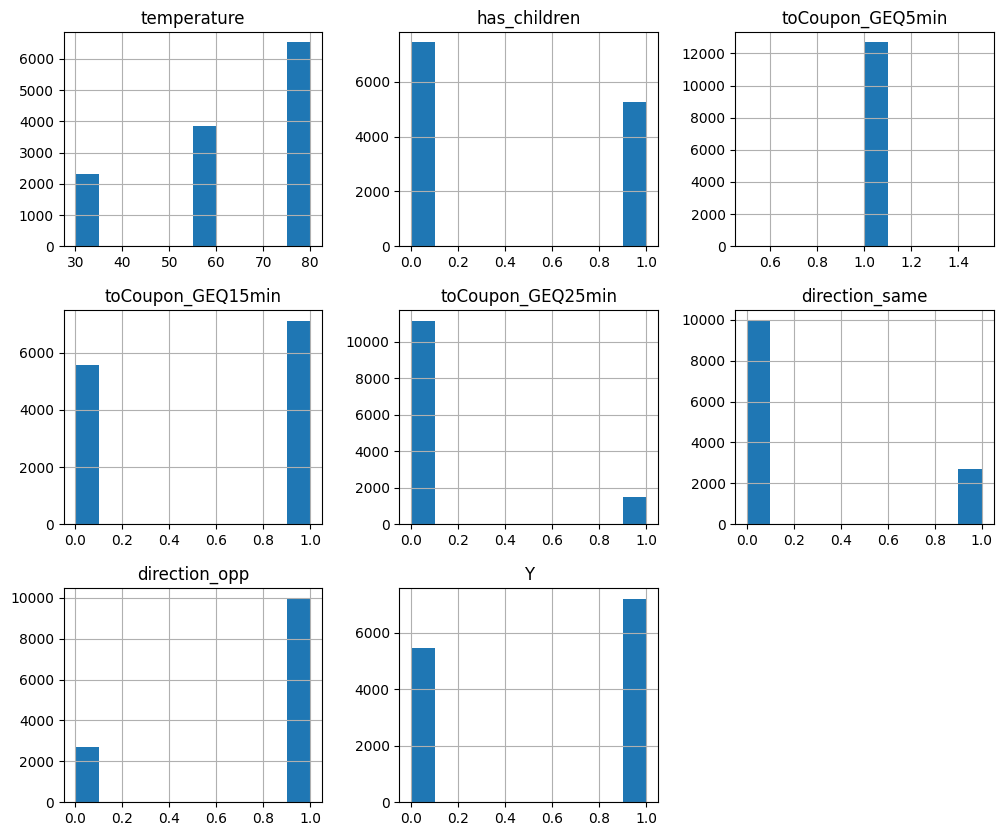

In [45]:
# Distribution of target variable
sns.countplot(x='Y', data=data)
plt.show()

# Distribution of numerical features
data.hist(figsize=(12, 10))
plt.show()


# **Correlation Analysis**

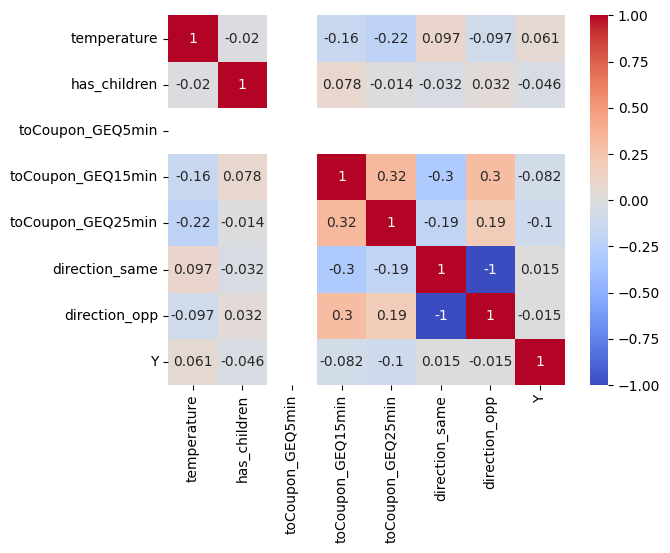

In [46]:
# Select only numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=['number'])

# Correlation matrix
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [47]:
data = pd.get_dummies(data, drop_first=True)


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['float64', 'int64']).drop('Y', axis=1)
data[numerical_features.columns] = scaler.fit_transform(numerical_features)


In [49]:
corr_matrix = data.corr()
print(corr_matrix['Y'].sort_values(ascending=False))


Y                               1.000000
coupon_Carry out & Take away    0.162635
coupon_Restaurant(<20)          0.148542
destination_No Urgent Place     0.130746
passanger_Friend(s)             0.125671
                                  ...   
coupon_Coffee House            -0.094731
toCoupon_GEQ25min              -0.103633
CoffeeHouse_never              -0.121036
expiration_2h                  -0.129740
toCoupon_GEQ5min                     NaN
Name: Y, Length: 97, dtype: float64


# **Data Preprocessing**

In [51]:
#Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X = data.drop('Y', axis=1)
y = data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Modeling**

**LOGISTIC REGRESSION**

In [55]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

log_model.fit(X_train,y_train)
y_prediction=log_model.predict(X_test)
y_prediction
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy is',accuracy_score(y_test,y_prediction))
print('precision is',precision_score(y_test,y_prediction))
print('recal is',recall_score(y_test,y_prediction))
print('f1_score is',f1_score(y_test,y_prediction))

accuracy is 0.6858494284588096
precision is 0.692938209331652
recal is 0.7799858055358411
f1_score is 0.7338898163606011


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**KNN CLASSIFIER**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
metrics_k=[]
neighbors=np.arange(1,15)

In [37]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(X_train,y_train)
    y_prediction=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_prediction)
    metrics_k.append(acc)

metrics_k

[0.6424911312573907,
 0.6026803310997241,
 0.6547102877414269,
 0.6381553015372488,
 0.6649586125344895,
 0.662987780843516,
 0.6732361056365787,
 0.675601103665747,
 0.6744186046511628,
 0.6759952700039417,
 0.6712652739456051,
 0.6752069373275522,
 0.6846669294442255,
 0.6882144264879779]

In [33]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7430035474970438
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69      1128
           1       0.74      0.83      0.78      1409

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.74      2537

Confusion Matrix:
 [[ 719  409]
 [ 243 1166]]


**DecisionTreeClassifier**

In [56]:
from sklearn.tree import DecisionTreeClassifier
ds_clf=DecisionTreeClassifier(criterion='entropy')
ds_clf.fit(X_train,y_train)
y_prediction=ds_clf.predict(X_test)

print(confusion_matrix(y_test,y_prediction))
print('accuracy is',accuracy_score(y_test,y_prediction))
print('precision is',precision_score(y_test,y_prediction))
print('recal is',recall_score(y_test,y_prediction))
print('f1_score is',f1_score(y_test,y_prediction))

[[ 731  397]
 [ 388 1021]]
accuracy is 0.6905794245171463
precision is 0.7200282087447109
recal is 0.7246273953158269
f1_score is 0.722320481075345


**RandomForestClassifier**

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_prediction_rf=rf_clf.predict(X_test)

print(confusion_matrix(y_test,y_prediction_rf))
print('accuracy is',accuracy_score(y_test,y_prediction_rf))
print('precision is',precision_score(y_test,y_prediction))
print('recal is',recall_score(y_test,y_prediction))
print('f1_score is',f1_score(y_test,y_prediction))

[[ 727  401]
 [ 248 1161]]
accuracy is 0.7441860465116279
precision is 0.7200282087447109
recal is 0.7246273953158269
f1_score is 0.722320481075345


In [58]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Fine-Tuning**

**Hyperparameter Tuning**

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 30, 'n_estimators': 200}


**Evaluate the Fine-Tuned Model**

In [61]:
y_pred = best_model.predict(X_test)
print("Accuracy of Fine-Tuned Model:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of Fine-Tuned Model: 0.7406385494678754
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.62      0.68      1128
           1       0.73      0.83      0.78      1409

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.74      2537



Driver will accept a coupon(Y=1)